# Cooing Prep

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
import simpleaudio as sa

In [2]:
# Read the wave file
filename = 'baby-cooing-01.wav'
with wave.open(filename, 'rb') as wf:
    # Get the wave file's parameters
    channels = wf.getnchannels()
    sample_width = wf.getsampwidth()
    framerate = wf.getframerate()
    n_frames = wf.getnframes()
    
    # Read the frames
    audio_data = wf.readframes(n_frames)

In [15]:
# Play the original wave file
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()

In [4]:
# Convert audio data to numpy array
audio_np = np.frombuffer(audio_data, dtype=np.int16)

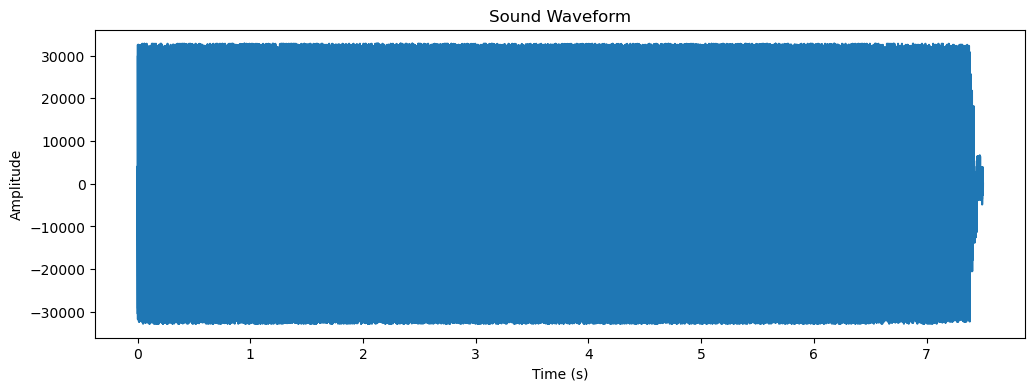

CPU times: total: 1.19 s
Wall time: 1.21 s


In [8]:
%%time
# Plot the sound waveform
plt.figure(figsize=(12, 4))
time = np.linspace(0, len(audio_np) / framerate, num=len(audio_np))
plt.plot(time, audio_np)
plt.title('Sound Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [9]:
# Compute the frequency spectrum
fft_data = fft(audio_np)
frequencies = np.fft.fftfreq(len(fft_data), 1/framerate)

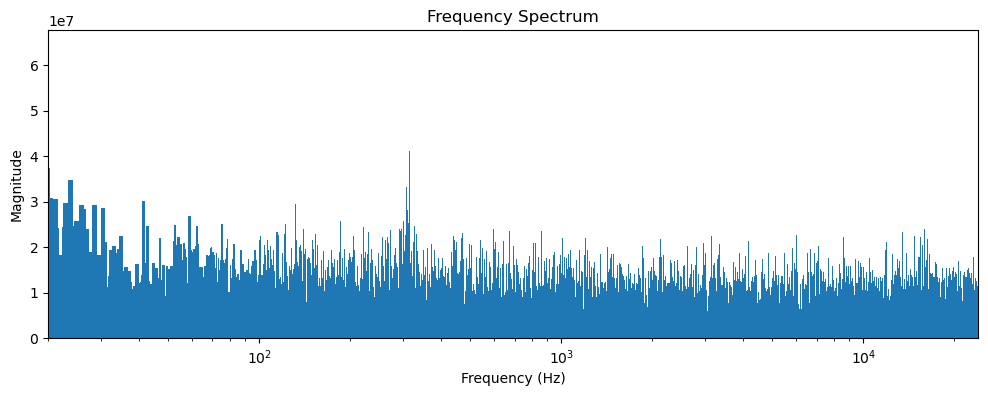

CPU times: total: 3min 14s
Wall time: 3min 34s


In [10]:
%%time
# Plot the frequency spectrum with thin bars
plt.figure(figsize=(12, 4))
plt.bar(frequencies[:len(frequencies)//2], np.abs(fft_data)[:len(fft_data)//2], width=1)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xscale('log')
plt.xlim(20, framerate/2)  # Limit x-axis from 20 Hz to Nyquist frequency
plt.show()

# Cooing Results

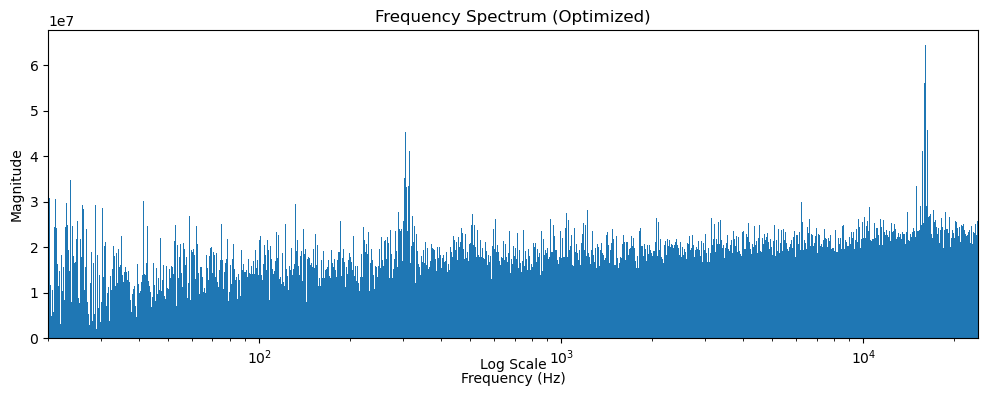

CPU times: total: 1.2 s
Wall time: 1.51 s


In [12]:
%%time
# Optimize by reducing the number of data points
n_points = 1000  # Number of points to plot
positive_freq = frequencies[:len(frequencies)//2]
magnitudes = np.abs(fft_data[:len(fft_data)//2])

# Logarithmically spaced frequency bins
log_freq_bins = np.logspace(np.log10(20), np.log10(framerate/2), n_points)

# Find the magnitude for each frequency bin
binned_magnitudes = np.zeros(n_points)
for i in range(n_points - 1):
    mask = (positive_freq >= log_freq_bins[i]) & (positive_freq < log_freq_bins[i+1])
    if np.any(mask):
        binned_magnitudes[i] = np.max(magnitudes[mask])

# Plot the optimized frequency spectrum with thin bars
plt.figure(figsize=(12, 4))
plt.bar(log_freq_bins[:-1], binned_magnitudes[:-1], width=np.diff(log_freq_bins), align='edge', linewidth=0.1)
plt.title('Frequency Spectrum (Optimized)')
plt.xlabel('Frequency (Hz)')
plt.text(0.5, -0.1, 'Log Scale', transform=plt.gca().transAxes, ha='center')
plt.ylabel('Magnitude')
plt.xscale('log')
plt.xlim(20, framerate/2)
plt.show()

# Laughing Prep

In [13]:
# Read the wave file
filename = 'baby-laughing-01.wav'
with wave.open(filename, 'rb') as wf:
    # Get the wave file's parameters
    channels = wf.getnchannels()
    sample_width = wf.getsampwidth()
    framerate = wf.getframerate()
    n_frames = wf.getnframes()
    
    # Read the frames
    audio_data = wf.readframes(n_frames)

In [14]:
# Play the original wave file
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()

In [ ]:
# Convert audio data to numpy array
audio_np = np.frombuffer(audio_data, dtype=np.int16)

# Compute the frequency spectrum
fft_data = fft(audio_np)
frequencies = np.fft.fftfreq(len(fft_data), 1/framerate)

# Laughing Results

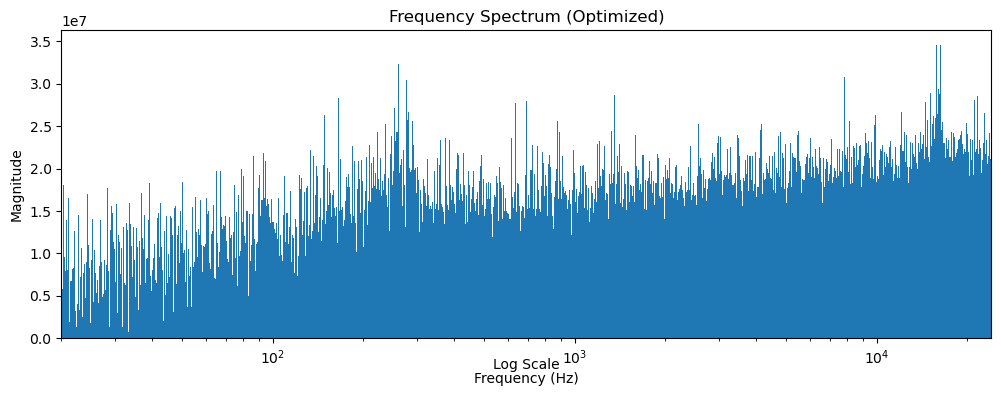

CPU times: total: 1.47 s
Wall time: 1.52 s


In [17]:
%%time
# Optimize by reducing the number of data points
n_points = 1000  # Number of points to plot
positive_freq = frequencies[:len(frequencies)//2]
magnitudes = np.abs(fft_data[:len(fft_data)//2])

# Logarithmically spaced frequency bins
log_freq_bins = np.logspace(np.log10(20), np.log10(framerate/2), n_points)

# Find the magnitude for each frequency bin
binned_magnitudes = np.zeros(n_points)
for i in range(n_points - 1):
    mask = (positive_freq >= log_freq_bins[i]) & (positive_freq < log_freq_bins[i+1])
    if np.any(mask):
        binned_magnitudes[i] = np.max(magnitudes[mask])

# Plot the optimized frequency spectrum with thin bars
plt.figure(figsize=(12, 4))
plt.bar(log_freq_bins[:-1], binned_magnitudes[:-1], width=np.diff(log_freq_bins), align='edge', linewidth=0.1)
plt.title('Frequency Spectrum (Optimized)')
plt.xlabel('Frequency (Hz)')
plt.text(0.5, -0.1, 'Log Scale', transform=plt.gca().transAxes, ha='center')
plt.ylabel('Magnitude')
plt.xscale('log')
plt.xlim(20, framerate/2)
plt.show()